# Data Project: Determining Income

CSPB 3022 - Introduction to Data Science Algorithms\
Name: Benjamin Price\
email: benjamin.price@colorado.edu

## Project Description

This project will seek to utilize a census dataset from 1994 to determine if or how well we can predict whether an individual makes an income of >50k or <=50k per year based on certain categories they may fall under, such as race, occupation, sex, etc.  The problem aims to predict a category (income either above or below 50k) for an individual, so the project will aim to use a classification method to solve the problem.  If we are able to use these categories to predict income to a fairly accurate degree, then we know we can use more current data in a similar way to see whether or not there are meaningful differences between the incomes of disparate groups of people.  Understanding these income disparities can point to certain systemic inequalities/discrimination that should be addressed in our society.

## Dataset Citation

The data used in this project was found on the UCI Machine Learning Repository website:\
Citation: Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

DataSet webpage: https://archive.ics.uci.edu/ml/datasets/Census+Income

This data was extracted from the census bureau database found at\
| http://www.census.gov/ftp/pub/DES/www/welcome.html\
| Donor: Ronny Kohavi and Barry Becker,\
|        Data Mining and Visualization\
|        Silicon Graphics.\
|        e-mail: ronnyk@sgi.com for questions.\

## Data Description

The original data was provided in a .data file, which included no headings and each line of data is separated by ", ".  Each value not listed as continuous would be considered a categorical type of data from a list of typically more than two options, with the exception being 'sex' with options Female or Male.  In total, there are 17188 full lines of data, with an additional one line of data at the end that was incomplete.  Null values are shown in the dataset as "?".

The data used in this project follows the following format.  In a typical tabular form, each heading is defined as follows in the documentation for the data:

age: continuous.\
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.\
fnlwgt (final weight): continuous.\
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.\
education-num: continuous.\
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.\
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.\
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.\
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.\
sex: Female, Male.\
capital-gain: continuous.\
capital-loss: continuous.\
hours-per-week: continuous.\
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.\
income: >50k, <=50k

The final weight column was a calculation described as follows (quoted directly from the adult.names file provided at https://archive.ics.uci.edu/ml/machine-learning-databases/adult/):

"*The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.  These are prepared monthly for us by Population Division here at the Census Bureau.  We use 3 sets of controls. These are:*\
    1.  A single cell estimate of the population 16+ for each state.\
    2.  Controls for Hispanic Origin by age and sex.\
    3.  Controls by Race, age and sex.*

*We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used.*

*The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement.  That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.*"


## Initial Data Analysis

Prior to formal cleaning, the following adjustments were made to the data:\
1) Headings were added to be congruent with .csv format.  The heading row included the same separator as the rest of the data ", "\
2) The final line of data was removed, since it was incomplete (possibly a result of an incomplete copy of the original data)

What follows is a general exploration of each column, including visualizations for each.  Please skip forward to the **Initial Data Analysis Summary** section for a summary of some of the findings here as well as an initial plan for what adjustments will be made to the initial dataset for the project.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import sklearn.linear_model
import patsy
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.discrete as smd
%matplotlib inline

In [2]:
# Reading in data from datafile
df = pd.read_csv('adult.csv', dtype='unicode', sep=", ", engine='python')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,17188,17188,17188,17188,17188,17188,17188,17188,17188,17188,17188,17188,17188,17188,17188
unique,71,9,13311,16,16,7,15,6,5,2,114,82,90,41,2
top,23,Private,190290,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
freq,473,11993,10,5606,5606,7882,2183,6929,14720,11526,15769,16384,8073,15384,13078


### Update datatypes of each column

In [5]:
df = df.astype({'age':'int32',
                'workclass': 'string',
                'fnlwgt': 'int32',
                'education': 'string',
                'education-num': 'int32',
                'relationship': 'string',
                'capital-gain': 'int32',
                'capital-loss': 'int32',
                'hours-per-week': 'int32',
                'native-country': 'string',
               },copy=True,errors='raise')
# 'marital-status': 'string',
# 'income': 'string'
# 'occupation': 'string',
# 'race': 'string',
# 'sex': 'string',

### Age Column

In [6]:
# Description of age
df['age'].describe()

count    17188.000000
mean        38.539388
std         13.635490
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

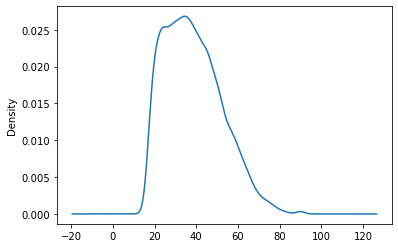

In [7]:
# KDE of age
df['age'].plot.kde();

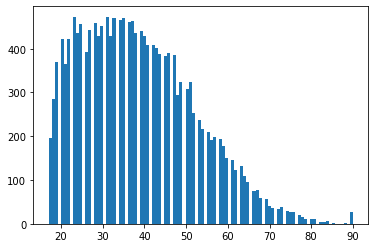

In [8]:
# Historgram of age
plt.hist(df['age'], bins=100);

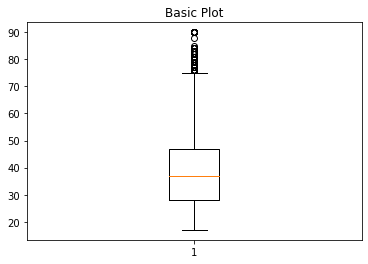

In [9]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df['age']);

In [10]:
# Number of rows with age above 75
df.loc[df['age'] > 75, 'age'].count()

137

### Workclass Column

In [11]:
# Description of Workclass
df['workclass'].describe()

count       17188
unique          9
top       Private
freq        11993
Name: workclass, dtype: object

In [12]:
# Unique values in workclass column
values = df['workclass'].unique()
values = list(values)
values.sort()
print('Unique values in workclass: ')
for value in values:
    print("    ",value)

Unique values in workclass: 
     ?
     Federal-gov
     Local-gov
     Never-worked
     Private
     Self-emp-inc
     Self-emp-not-inc
     State-gov
     Without-pay


In [13]:
# Number of null values in workclass column
nulls = df.loc[df['workclass'] == '?', 'workclass'].count()
print('Null values in workclass: ',nulls)

Null values in workclass:  966


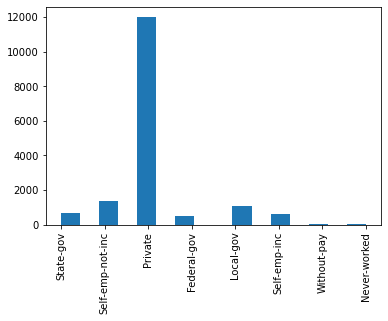

In [14]:
# Histogram of workclass without null values
plt.hist(df.loc[df['workclass'] != '?', 'workclass'], bins=16);
plt.xticks(rotation=90);

### Fnlwgt Column

In [15]:
# Description of fnlwgt
df['fnlwgt'].describe()

count    1.718800e+04
mean     1.902087e+05
std      1.053494e+05
min      1.228500e+04
25%      1.187682e+05
50%      1.788235e+05
75%      2.378262e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

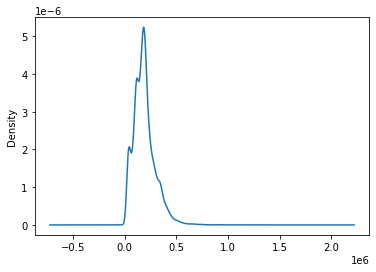

In [16]:
# KDE of fnlwgt
df['fnlwgt'].plot.kde();

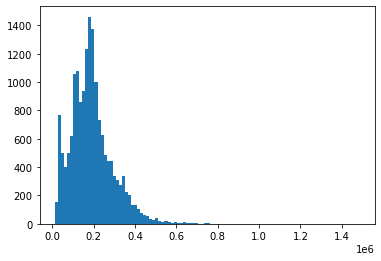

In [17]:
plt.hist(df['fnlwgt'], bins=100);

### Education Column

In [18]:
# Description of education
df['education'].describe()

count       17188
unique         16
top       HS-grad
freq         5606
Name: education, dtype: object

In [19]:
# Unique values in education
values = df['education'].unique()
values = list(values)
values.sort()
print('Unique values in education: ')
for value in values:
    print("    ",value)

Unique values in education: 
     10th
     11th
     12th
     1st-4th
     5th-6th
     7th-8th
     9th
     Assoc-acdm
     Assoc-voc
     Bachelors
     Doctorate
     HS-grad
     Masters
     Preschool
     Prof-school
     Some-college


In [20]:
# Are there any null values in education?
nulls = df.loc[df['education'] == '?', 'education'].count()
print('Null values in education: ',nulls)

Null values in education:  0


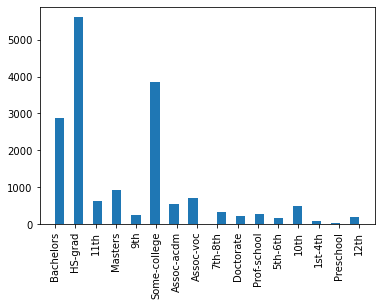

In [21]:
# Histogram of education
plt.hist(df['education'], bins=32);
plt.xticks(rotation=90);

### Education-num Column

In [22]:
# Description of education-num
df['education-num'].describe()

count    17188.000000
mean        10.094019
std          2.557241
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

In [23]:
# Unique values in education-num
values = df['education-num'].unique()
values = list(values)
values.sort()
print('Unique values in education-num: ')
for value in values:
    print("    ",value)

Unique values in education-num: 
     1
     2
     3
     4
     5
     6
     7
     8
     9
     10
     11
     12
     13
     14
     15
     16


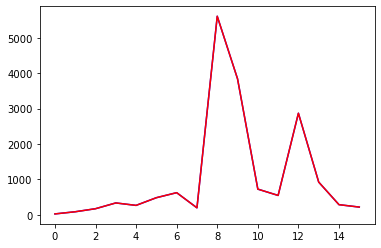

In [24]:
# Are these values correlated with the 'education' column?
# education values in order
education_values = ['Preschool','1st-4th','5th-6th','7th-8th',
                    '9th','10th','11th','12th',
                    'HS-grad','Some-college','Assoc-voc','Assoc-acdm',
                    'Bachelors','Masters','Prof-school','Doctorate']
education_counts = []
for value in education_values:
    education_counts.append(df.loc[df['education'] == value, 'education'].count())
education_c = pd.Series(education_counts)

education_num_counts = []
for i in range(1,17):
    education_num_counts.append(df.loc[df['education-num'] == i, 'education-num'].count())
education_num_c = pd.Series(education_num_counts)

plt.plot(education_c, color='blue');
plt.plot(education_num_c, color="red");
# The plots exactly match and the red one is overlapping the blue!

### Marital-status Column

In [25]:
# Description of marital-status
df['marital-status'].describe()

count                  17188
unique                     7
top       Married-civ-spouse
freq                    7882
Name: marital-status, dtype: object

In [26]:
# Unique values in marital-status
values = df['marital-status'].unique()
values = list(values)
values.sort()
print('Unique values in marital-status: ')
for value in values:
    print("    ",value)

Unique values in marital-status: 
     Divorced
     Married-AF-spouse
     Married-civ-spouse
     Married-spouse-absent
     Never-married
     Separated
     Widowed


In [27]:
# Are there any null values in marital-status?
nulls = df.loc[df['marital-status'] == '?', 'marital-status'].count()
print('Null values in marital-status: ',nulls)

Null values in marital-status:  0


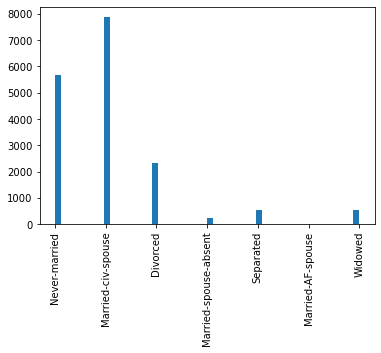

In [28]:
# Histogram of marital-status
plt.hist(df['marital-status'], bins=50);
plt.xticks(rotation=90);

### Occupation Column

In [29]:
# Description of occupation
df['occupation'].describe()

count              17188
unique                15
top       Prof-specialty
freq                2183
Name: occupation, dtype: object

In [30]:
# Unique values in occupation
values = df['occupation'].unique()
values = list(values)
values.sort()
print('Unique values in occupation: ')
for value in values:
    print("    ",value)

Unique values in occupation: 
     ?
     Adm-clerical
     Armed-Forces
     Craft-repair
     Exec-managerial
     Farming-fishing
     Handlers-cleaners
     Machine-op-inspct
     Other-service
     Priv-house-serv
     Prof-specialty
     Protective-serv
     Sales
     Tech-support
     Transport-moving


In [31]:
# Number of null values in occupation
nulls = df.loc[df['occupation'] == '?', 'occupation'].count()
print('Null values in occupation: ',nulls)

Null values in occupation:  969


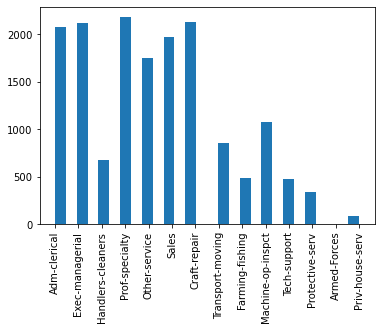

In [32]:
# Histogram of occupation without null values
plt.hist(df.loc[df['occupation'] != '?', 'occupation'], bins=28);
plt.xticks(rotation=90);

### Relationship Column

In [33]:
# Description of relationship
df['relationship'].describe()

count       17188
unique          6
top       Husband
freq         6929
Name: relationship, dtype: object

In [34]:
# Unique values of relationship
values = df['relationship'].unique()
values = list(values)
values.sort()
print('Unique values in relationship: ')
for value in values:
    print("    ",value)

Unique values in relationship: 
     Husband
     Not-in-family
     Other-relative
     Own-child
     Unmarried
     Wife


In [35]:
# Are there any null values in relationship?
nulls = df.loc[df['relationship'] == '?', 'relationship'].count()
print('Null values in relationship: ',nulls)

Null values in relationship:  0


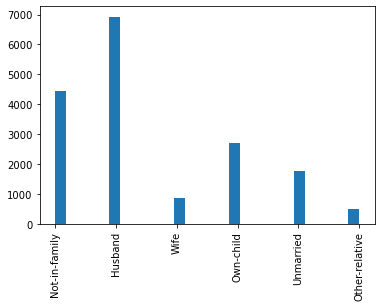

In [36]:
# Histogram of relationship
plt.hist(df['relationship'], bins=28);
plt.xticks(rotation=90);

### Race Column

In [37]:
# Description of race
df['race'].describe()

count     17188
unique        5
top       White
freq      14720
Name: race, dtype: object

In [38]:
# Unique values in race
values = df['race'].unique()
values = list(values)
values.sort()
print('Unique values in race: ')
for value in values:
    print("    ",value)

Unique values in race: 
     Amer-Indian-Eskimo
     Asian-Pac-Islander
     Black
     Other
     White


In [39]:
# Are there any null values in race?
nulls = df.loc[df['race'] == '?', 'race'].count()
print('Null values in race: ',nulls)

Null values in race:  0


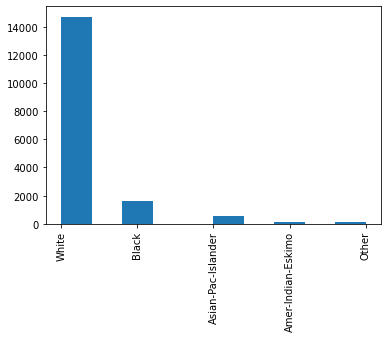

In [40]:
# Histogram of race
plt.hist(df['race'], bins=10);
plt.xticks(rotation=90);

### Sex Column

In [41]:
# Description of sex column
df['sex'].describe()

count     17188
unique        2
top        Male
freq      11526
Name: sex, dtype: object

In [42]:
# Unique values in sex
values = df['sex'].unique()
values = list(values)
values.sort()
print('Unique values in sex: ')
for value in values:
    print("    ",value)

Unique values in sex: 
     Female
     Male


In [43]:
# Are there any null values in sex?
nulls = df.loc[df['sex'] == '?', 'sex'].count()
print('Null values in sex: ',nulls)

Null values in sex:  0


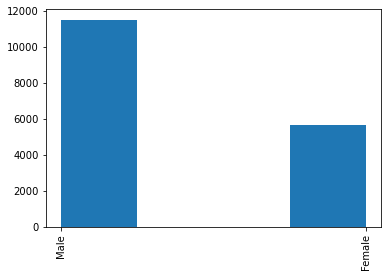

In [44]:
# Histogram of sex
plt.hist(df['sex'], bins=4);
plt.xticks(rotation=90);

### Capital-gain Column

In [45]:
# Description of capital-gain column
df['capital-gain'].describe()

count    17188.000000
mean      1046.258087
std       7223.483653
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

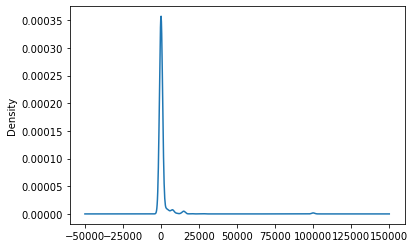

In [46]:
# KDE of capital-gain
df['capital-gain'].plot.kde();

In [47]:
# What is the median value?
df['capital-gain'].median()

0.0

In [48]:
# How many values are there above and below the mean, and how many values are == 0?
above_mean = df.loc[df['capital-gain'] > df['capital-gain'].mean(), 'capital-gain'].count()
below_mean = df.loc[df['capital-gain'] < df['capital-gain'].mean(), 'capital-gain'].count()
zeros = df.loc[df['capital-gain'] == 0, 'capital-gain'].count()
percent_zeros = round((zeros / df['capital-gain'].count()) * 100,2)
print('Above the mean: ',above_mean)
print('Below the mean: ',below_mean)
print('Number of values equal to 0: ',zeros)
print('Percent Zeros: ',percent_zeros,'%')

Above the mean:  1391
Below the mean:  15797
Number of values equal to 0:  15769
Percent Zeros:  91.74 %


### Capital-loss Column

In [49]:
# Description of capital-loss column
df['capital-loss'].describe()

count    17188.000000
mean        86.902781
std        400.441798
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

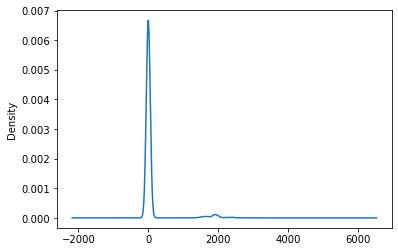

In [50]:
# KDE of capital-loss
df['capital-loss'].plot.kde();

In [51]:
# How many values are there above and below the mean, and how many values are == 0?
above_mean = df.loc[df['capital-loss'] > df['capital-loss'].mean(), 'capital-loss'].count()
below_mean = df.loc[df['capital-loss'] < df['capital-loss'].mean(), 'capital-loss'].count()
zeros = df.loc[df['capital-loss'] == 0, 'capital-loss'].count()
percent_zeros = round((zeros / df['capital-loss'].count()) * 100,2)
print('Above the mean: ',above_mean)
print('Below the mean: ',below_mean)
print('Number of values equal to 0: ',zeros)
print('Percent Zeros: ',percent_zeros,'%')

Above the mean:  804
Below the mean:  16384
Number of values equal to 0:  16384
Percent Zeros:  95.32 %


### Hours-per-week Column

In [52]:
# Description of hours-per-week column
df['hours-per-week'].describe()

count    17188.000000
mean        40.424540
std         12.272481
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

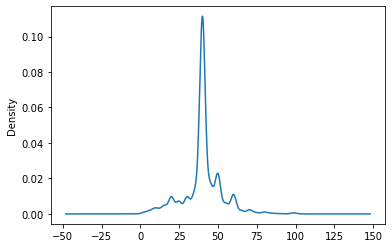

In [53]:
# KDE of hours-per-week
df['hours-per-week'].plot.kde();

In [54]:
# Does hours per week correlate with occupation?
temp = df.groupby('occupation')
temp['hours-per-week'].mean()

# It looks like hours per week is similar to expected with a general 40-hr work week

occupation
?                    31.672859
Adm-clerical         37.558072
Armed-Forces         47.500000
Craft-repair         41.960094
Exec-managerial      45.179548
Farming-fishing      47.372188
Handlers-cleaners    38.731563
Machine-op-inspct    40.739739
Other-service        34.344946
Priv-house-serv      32.211765
Prof-specialty       42.590014
Protective-serv      43.000000
Sales                40.950736
Tech-support         39.336170
Transport-moving     44.732394
Name: hours-per-week, dtype: float64

### Native-country Column

In [55]:
# Description of native-country column
df['native-country'].describe()

count             17188
unique               41
top       United-States
freq              15384
Name: native-country, dtype: object

In [56]:
# Unique values in native-country
values = df['native-country'].unique()
values = list(values)
values.sort()
print('Unique values in native-country: ')
for value in values:
    print("    ",value)

Unique values in native-country: 
     ?
     Cambodia
     Canada
     China
     Columbia
     Cuba
     Dominican-Republic
     Ecuador
     El-Salvador
     England
     France
     Germany
     Greece
     Guatemala
     Haiti
     Honduras
     Hong
     Hungary
     India
     Iran
     Ireland
     Italy
     Jamaica
     Japan
     Laos
     Mexico
     Nicaragua
     Outlying-US(Guam-USVI-etc)
     Peru
     Philippines
     Poland
     Portugal
     Puerto-Rico
     Scotland
     South
     Taiwan
     Thailand
     Trinadad&Tobago
     United-States
     Vietnam
     Yugoslavia


In [57]:
# Number of null values in native-country
nulls = df.loc[df['native-country'] == '?', 'native-country'].count()
print('Null values in native-country: ',nulls)

Null values in native-country:  312


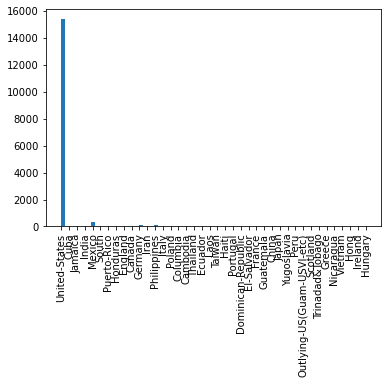

In [58]:
# Histogram of native-country without null values
plt.hist(df.loc[df['native-country'] != '?', 'native-country'], bins=82);
plt.xticks(rotation=90);

In [59]:
# How many people were from United-States?
us = df.loc[df['native-country'] == 'United-States', 'native-country'].count()
percent_us = round((us / df['native-country'].count()) * 100, 2)
print('Total United-States',us)
print('Percent United-States: ',percent_us,'%')

Total United-States 15384
Percent United-States:  89.5 %


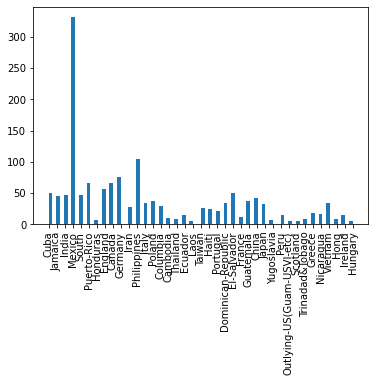

In [60]:
# Histogram of native-country without United-States or null values
temp = df[df['native-country'] != '?']
plt.hist(temp.loc[temp['native-country'] != 'United-States', 'native-country'], bins=80);
plt.xticks(rotation=90);

### Income Column

In [61]:
# Description of income column
df['income'].describe()

count     17188
unique        2
top       <=50K
freq      13078
Name: income, dtype: object

In [62]:
# Unique values in income
values = df['income'].unique()
values = list(values)
values.sort()
print('Unique values in income: ')
for value in values:
    print("    ",value)

Unique values in income: 
     <=50K
     >50K


In [63]:
# Any null values in income?
nulls = df.loc[df['income'] == '?', 'income'].count()
print('Null values in income: ',nulls)

Null values in income:  0


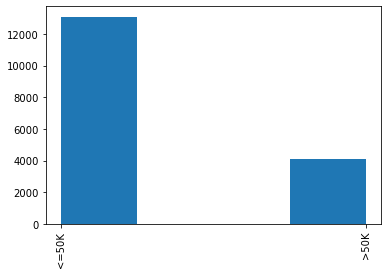

In [64]:
# Histogram of income
plt.hist(df['income'], bins=4);
plt.xticks(rotation=90);

## Initial Data Analysis Summary

### age

The age data seems pretty well spread out as shown on the histogram, with the majority of ages in the interquartile range of 28 and 47.  The boxplot shows some potential outliers in the data, above the age of 75.  It was found that only 137 rows have an age above 75, so these will be removed from the dataset to avoid any potential skew resulting from these outliers.

### workclass vs occupation

The majority of entries for the workclass attribute are 'Private' and any differences between workclasses should be inherently captured in the occupation attribute.  The histogram for the occupation attribute seems much more evenly distributed than that of workclass, and it only contains 969 null values.  We will go ahead and drop the workclass attribute and also drop any rows for which occupation is null.  Being that there are over 17,000 rows in the column, we should still have sufficient data for our model.

### education vs education-num

It is clear from the overlayed plots above for the counts of the values in columns 'education' and 'education-num' that these are equivalent.  The only difference is that 'education-num' preserves the order of the data, while 'education' provides a description of the level of education.  For now, I will plan on keeping both to preserve that information per row, but in the future I may remove the 'education' column and keep the definitions of each level of education in another form for reference.  Neither column contains any null values.

### marital-status and relationship

The majority of data for marital-status seems to be distributed between Never-married and Married-civ-spouse, with a few pieces of data sprinkled between the other options.  To simplify this data, we will combine the options that are married and all of the options that indicate not being married.  This will result in the data being a binary classification between married and unmarried, which suits this project better and will help prevent small skews from separating out sub-types of marital status.  The core idea of the attribute will still remain.  We will seek to find how marital-status effects our model in relation to income.

The relationship attribute seems to have options that overlap with marital-status and it is unclear what additional benefit including this column in our data would bring.  Therefore, we will omit this column and use our binary marital-status attribute to capture this aspect of each row of data.

### capital-gain and capital-loss

The KDEs of both columns capital-gain and capital-loss led me to believe that they may be fairly unhelpful for this project.  91.74% of the values in the capital-gain column are zeros, and the percent of zeros in the capital-loss column is 95.32%.  I will be removing these columns from the dataset to focus on more relevant categories.

### native-country

The vast majority of data (89.5%) was taken from individuals whose native country was the United States.  Similar to capital-gain and capital-loss, we will remove the native-country column to focus on more relevant categories during the classification problem.

### fnlwgt

In all honesty, this column is a bit of a mystery to me.  Toward the beginning of this write-up, I provided the exact definition from the data source, but I'm still unsure if this data is useful for this project in a meaningful way.  Without knowing exactly how these values were calculated, this column may be ommitted, even though the distribution of the data seems interesting and I'm certain it may have some interesting relation with income.

## Updates to Dataset

In [65]:
# Drop workclass, relationship, capital-gain, capital-loss, native-country, fnlwgt columns
df_drops = df.drop(columns=[
    'workclass','relationship','capital-gain','capital-loss','native-country','fnlwgt'
])

# Remove age outlier rows from dataset
df_no_age_outliers = df_drops[df_drops['age'] <= 75]

# Drop occupation values with null values
df_no_occupation_nulls = df_no_age_outliers[df_no_age_outliers['occupation'] != '?']

# For marital-status:
# combine 'Never-married','Divorced','Separated', and 'Widowed' as 'Married'
df_ms = df_no_occupation_nulls
df_ms.loc[df_ms['marital-status'].str.contains('Never-married|Divorced|Separated|Widowed'), 'marital-status'] = 'Not-married'

# combine 'Married-civ-spouse','Married-spouse-absent', and 'Married-AF-spouse' as 'Not-married'
df_ms.loc[df_ms['marital-status'].str.contains('Married-civ-spouse|Married-spouse-absent|Married-AF-spouse'), 'marital-status'] = 'Married'

# What does our data look like after our initial analysis?
df2 = df_ms
df2.head()

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,age,education,education-num,marital-status,occupation,race,sex,hours-per-week,income
0,39,Bachelors,13,Not-married,Adm-clerical,White,Male,40,<=50K
1,50,Bachelors,13,Married,Exec-managerial,White,Male,13,<=50K
2,38,HS-grad,9,Not-married,Handlers-cleaners,White,Male,40,<=50K
3,53,11th,7,Married,Handlers-cleaners,Black,Male,40,<=50K
4,28,Bachelors,13,Married,Prof-specialty,Black,Female,40,<=50K


## Combined Attribute Analysis

During our Initial Data Analysis in the previous section we examined each attribute in isolation to find attributes that were either not applicable or partially redundant in the dataset for our purposes with the project.  In this section, we will take some time to look at each of the remaining attributes, including our target attribute income, in combinations to see if there are still some attributes that can be ommitted from our finished models.  Please skip ahead to the **Combined Attribute Analysis Summary** section to find a summary of these findings.

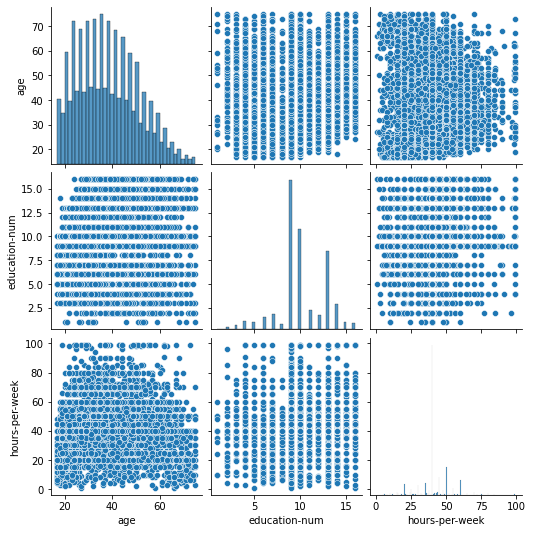

In [66]:
# General pairplot of the continuous attributes
sns.pairplot(df2)

### age with income

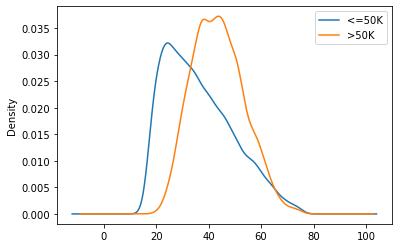

In [67]:
df2_low_income = df2[df2['income'] == '<=50K']
#df2_low_income['age'].plot.kde()

df2_high_income = df2[df2['income'] == '>50K']
#df2_high_income['age'].plot.kde()

fig, ax = plt.subplots()
df2_low_income['age'].plot.kde(ax=ax, label='<=50K')
df2_high_income['age'].plot.kde(ax=ax, label='>50K')
ax.legend()

plt.show()

### education with income

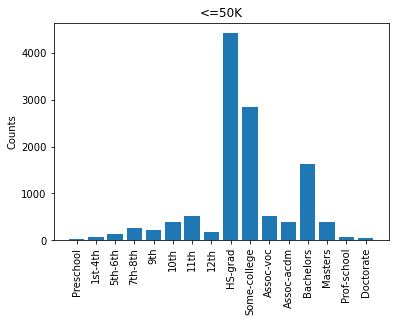

In [70]:
# Plot bar graph of education with low income
education_values = ['Preschool','1st-4th','5th-6th','7th-8th',
                    '9th','10th','11th','12th',
                    'HS-grad','Some-college','Assoc-voc','Assoc-acdm',
                    'Bachelors','Masters','Prof-school','Doctorate']

low_income_counts = []
for value in education_values:
    count = df2_low_income.loc[df2_low_income['education'] == value, 'education'].count()
    low_income_counts.append(count)


    
x_locs = np.arange(len(education_values))

plt.bar(x_locs, low_income_counts)
plt.title('<=50K')
plt.xticks(x_locs, education_values, rotation=90)
plt.ylabel('Counts')

plt.show();

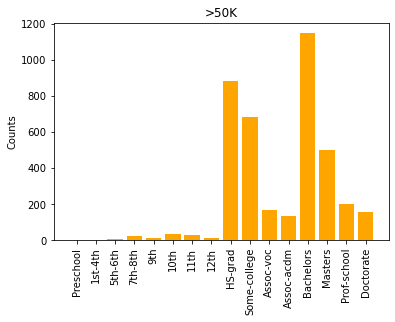

In [71]:
# Plot bar graph of education with high income
high_income_counts = []
for value in education_values:
    count = df2_high_income.loc[df2_high_income['education'] == value, 'education'].count()
    high_income_counts.append(count)

plt.bar(x_locs, high_income_counts, color='orange')
plt.title('>50K')
plt.xticks(x_locs, education_values, rotation=90)
plt.ylabel('Counts')

plt.show();

### marital-status with income

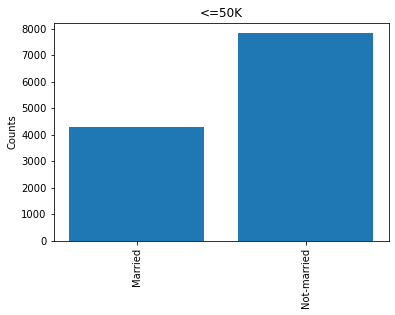

In [72]:
# Plot bar graph of marital-status with low income
x_locs = [0,1]
x_labs = ['Married', 'Not-married']

m_count = df2_low_income.loc[df2_low_income['marital-status'] == 'Married', 'marital-status'].count()
nm_count = df2_low_income['marital-status'].count() - m_count

plt.bar(x_locs, [m_count, nm_count])
plt.title('<=50K')
plt.xticks(x_locs, x_labs, rotation=90)
plt.ylabel('Counts')

plt.show();

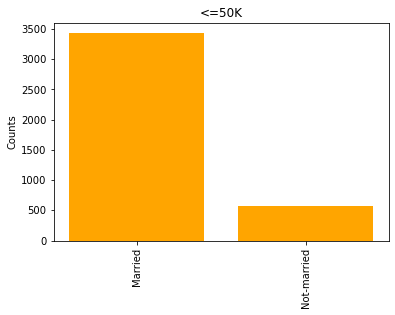

In [73]:
# Plot bar graph of marital-status with high income
x_locs = [0,1]
x_labs = ['Married', 'Not-married']

m_count = df2_high_income.loc[df2_high_income['marital-status'] == 'Married', 'marital-status'].count()
nm_count = df2_high_income['marital-status'].count() - m_count

plt.bar(x_locs, [m_count, nm_count], color='orange')
plt.title('<=50K')
plt.xticks(x_locs, x_labs, rotation=90)
plt.ylabel('Counts')

plt.show();

### occupation with income

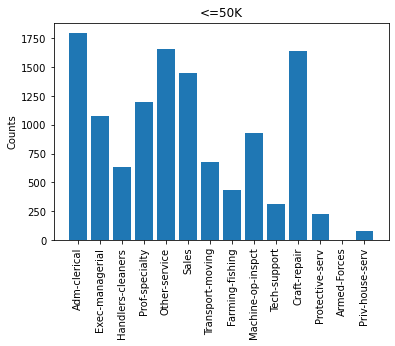

In [75]:
# Plot bar graph of occupation with low income
occupation_values = df2_low_income['occupation'].unique()

low_income_counts = []
for value in occupation_values:
    count = df2_low_income.loc[df2_low_income['occupation'] == value, 'occupation'].count()
    low_income_counts.append(count)
    
x_locs = np.arange(len(occupation_values))

plt.bar(x_locs, low_income_counts)
plt.title('<=50K')
plt.xticks(x_locs, occupation_values, rotation=90)
plt.ylabel('Counts')

plt.show();

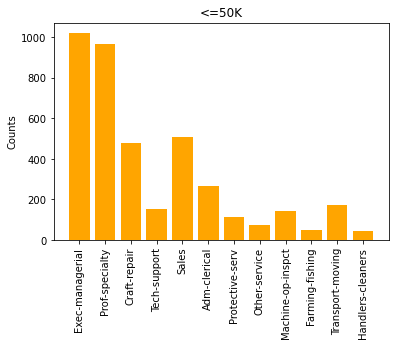

In [76]:
# Plot bar graph of occupation with high income
occupation_values = df2_high_income['occupation'].unique()

high_income_counts = []
for value in occupation_values:
    count = df2_high_income.loc[df2_high_income['occupation'] == value, 'occupation'].count()
    high_income_counts.append(count)
    
x_locs = np.arange(len(occupation_values))

plt.bar(x_locs, high_income_counts, color='orange')
plt.title('<=50K')
plt.xticks(x_locs, occupation_values, rotation=90)
plt.ylabel('Counts')

plt.show();

### race with income

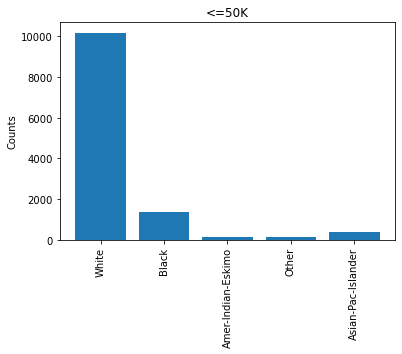

In [77]:
# Plot bar graph of race with low income
race_values = df2_low_income['race'].unique()

low_income_counts = []
for value in race_values:
    count = df2_low_income.loc[df2_low_income['race'] == value, 'race'].count()
    low_income_counts.append(count)
    
x_locs = np.arange(len(race_values))

plt.bar(x_locs, low_income_counts)
plt.title('<=50K')
plt.xticks(x_locs, race_values, rotation=90)
plt.ylabel('Counts')

plt.show();

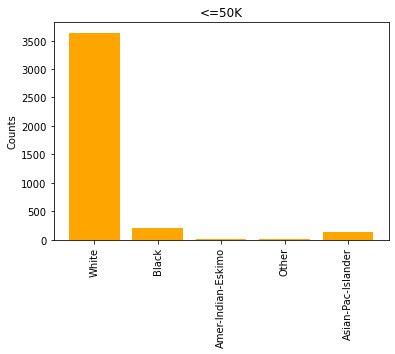

In [78]:
# Plot bar graph of race with high income
sex_values = df2_high_income['race'].unique()

high_income_counts = []
for value in race_values:
    count = df2_high_income.loc[df2_high_income['race'] == value, 'race'].count()
    high_income_counts.append(count)
    
x_locs = np.arange(len(race_values))

plt.bar(x_locs, high_income_counts, color='orange')
plt.title('<=50K')
plt.xticks(x_locs, race_values, rotation=90)
plt.ylabel('Counts')

plt.show();

### sex with income

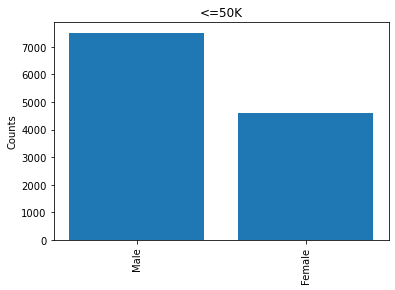

In [79]:
# Plot bar graph of race with low income
sex_values = ['Male', 'Female']

low_income_counts = []
for value in sex_values:
    count = df2_low_income.loc[df2_low_income['sex'] == value, 'sex'].count()
    low_income_counts.append(count)
    
x_locs = np.arange(len(sex_values))

plt.bar(x_locs, low_income_counts)
plt.title('<=50K')
plt.xticks(x_locs, sex_values, rotation=90)
plt.ylabel('Counts')

plt.show();

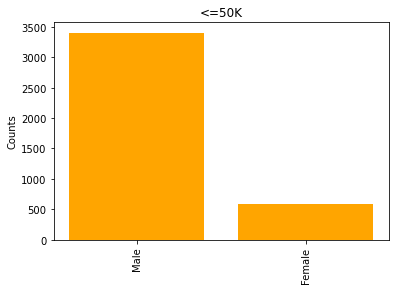

In [80]:
# Plot bar graph of race with high income
sex_values = ['Male', 'Female']

high_income_counts = []
for value in sex_values:
    count = df2_high_income.loc[df2_high_income['sex'] == value, 'sex'].count()
    high_income_counts.append(count)
    
x_locs = np.arange(len(sex_values))

plt.bar(x_locs, high_income_counts, color='orange')
plt.title('<=50K')
plt.xticks(x_locs, sex_values, rotation=90)
plt.ylabel('Counts')

plt.show();

### hours-per-week with income

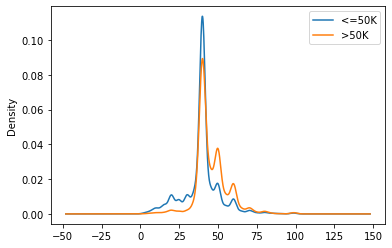

In [81]:
fig, ax = plt.subplots()
df2_low_income['hours-per-week'].plot.kde(ax=ax, label='<=50K')
df2_high_income['hours-per-week'].plot.kde(ax=ax, label='>50K')
ax.legend()

plt.show()

In [82]:
print("Mean hours-per-week")
print("low-income:",df2_low_income['hours-per-week'].mean())
print("high-income",df2_high_income['hours-per-week'].mean())

Mean hours-per-week
low-income: 39.49546503957784
high-income 45.61902377972466


In [83]:
import scipy as sp
import scipy.stats as stats
a = df2_low_income['hours-per-week']
b = df2_high_income['hours-per-week']
t, p = stats.ttest_ind(a, b, equal_var=False)
print("t:",t,"p:", p)

t: -30.814737707214917 p: 1.6158314128774904e-196


## Combined Attribute Analysis Summary

We began the combined analysis by looking at a pairplot of the continuous attributes.  There doesn't appear to be any correlations on the pairplots between these attributes, which means each one may influence income independently.  This is helpful because if some were very strongly correlated with each other, we may have had to remove one attribute to prevent any odd interactions between those two attributes and income.

In looking at age with income, we see a difference between those with low vs high income in our kernal density estimate graphs.  This gives the perception that being older may correlate with having a higher income and it will be interesting to see how that impacts our model.

Looking at each of the categorical attributes (education, occupation, sex, race, marital-status), we created bar plots for those with low-income and those with high-income.  For education, occupation, and marital-status, we can see quite a difference between the counts of those with low vs high income, which seems to indicate that these attributes will be influential in our model.  For sex and race, we do see slight differences between high vs low income, but taking into account the difference between the total number of those with low vs high income, those differences may be quite small.  We will keep these attributes to begin the creation of our model, although we may try models both with and without these attributes to see if models without have a better fit.

The hours-per-week data was very intersting.  In plotting KDE graphs of those with low vs high income, the resulting graphs seemed very similar, with the high income graph showing just a slight left-skew.  Because the means were different, we performed a quick and dirty Welch's 2-sample t-test using the scipy library and found an incredibly small p-value.  Despite the graphs being similar, this indicates that the difference may be significant so we will keep this attribute for our model.

## Logistic Regression Model

In the following section, we will first perform logistic regressions on each feature in isolation to get an idea of which feature may be the strongest predictor of income.  After we find that out, we will utilize the idea of Forward Stepwise Selection to add features to our model that add the highest score each time.  Once we have the model with the highest score for it's number of features, we will see how the model performs with the data split between training and test data and look at the results using a confusion matrix.

### One Feature Logistic Regression

In [84]:
def logistic(model, x):
    z = np.exp(model.intercept_ + model.coef_ * x)
    return z / (1 + z)

Intercept is [-2.87104392]
Logistic coefficient is [[0.04414514]]
Score is 0.7386962724058798


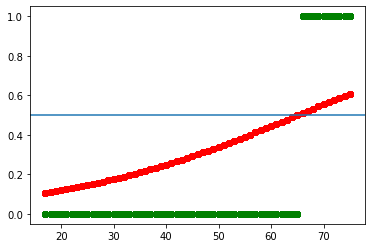

In [89]:
# logistic regression with only age
age_y, age_X = patsy.dmatrices("C(income, [[0],[1]]) ~ 0 + age", data=df2)
lr = sklearn.linear_model.LogisticRegressionCV()
age_income_mod = lr.fit(age_X, age_y.ravel())

print('Intercept is', age_income_mod.intercept_)
print('Logistic coefficient is', age_income_mod.coef_)

print('Score is', age_income_mod.score(age_X, age_y.ravel()))

yhat = age_income_mod.predict(age_X)

plt.plot(age_X, yhat,'go');
plt.plot(age_X, logistic(age_income_mod, age_X), 'ro')
plt.axhline(0.5);

Intercept is [-4.81795879]
Logistic coefficient is [[0.34816749]]
Score is 0.7731811697574893


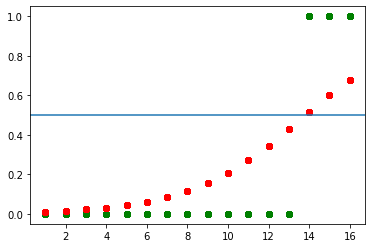

In [90]:
# logistic regression with only education-num
ed_y, ed_X = patsy.dmatrices("C(income, [[0],[1]]) ~ 0 + Q('education-num')", data=df2)
lr = sklearn.linear_model.LogisticRegressionCV()
ed_income_mod = lr.fit(ed_X, ed_y.ravel())

print('Intercept is', ed_income_mod.intercept_)
print('Logistic coefficient is',ed_income_mod.coef_)

print('Score is', ed_income_mod.score(ed_X, ed_y.ravel()))

yhat = ed_income_mod.predict(ed_X)

plt.plot(ed_X, yhat,'go');
plt.plot(ed_X, logistic(ed_income_mod, ed_X), 'ro')
plt.axhline(0.5);

In [ ]:
# logistic regression with only marital-status
mar_y, mar_X = patsy.dmatrices("C(income, [[0],[1]]) ~ 0 + C(Q('marital-status'))", data=df2)
lr = sklearn.linear_model.LogisticRegressionCV()
mar_income_mod = lr.fit(mar_X, mar_y.ravel())

print('Intercept is', mar_income_mod.intercept_)
print('Logistic coefficient is',mar_income_mod.coef_)

print('Score is', mar_income_mod.score(mar_X, mar_y.ravel()))

In [ ]:
# logistic regression with only occupation
occ_y, occ_X = patsy.dmatrices("C(income, [[0],[1]]) ~ 0 + C(occupation)", data=df2)
lr = sklearn.linear_model.LogisticRegressionCV()
occ_income_mod = lr.fit(occ_X, occ_y.ravel())

print('Intercept is', occ_income_mod.intercept_)
print('Logistic coefficient is',occ_income_mod.coef_)

print('Score is', occ_income_mod.score(occ_X, occ_y.ravel()))

In [ ]:
# logistic regression with only race
race_y, race_X = patsy.dmatrices("C(income, [[0],[1]]) ~ 0 + C(race)", data=df2)
lr = sklearn.linear_model.LogisticRegressionCV()
race_income_mod = lr.fit(race_X, race_y.ravel())

print('Intercept is', race_income_mod.intercept_)
print(df2['race'].unique())
print('Logistic coefficient is',race_income_mod.coef_)

print('Score is', race_income_mod.score(race_X, race_y.ravel()))


In [91]:
# logistic regression with only sex
sex_y, sex_X = patsy.dmatrices("C(income, [[0],[1]]) ~ 0 + C(sex)", data=df2)
lr = sklearn.linear_model.LogisticRegressionCV()
sex_income_mod = lr.fit(sex_X, sex_y.ravel())

print('Intercept is', sex_income_mod.intercept_)
print('Logistic coefficient is',sex_income_mod.coef_)

print('Score is', sex_income_mod.score(sex_X, sex_y.ravel()))

Intercept is [-1.13326197]
Logistic coefficient is [[-0.06178015  0.06178003]]
Score is 0.7522173292811511


Intercept is [-3.00425705]
Logistic coefficient is [[0.04468355]]
Score is 0.7450226384667866


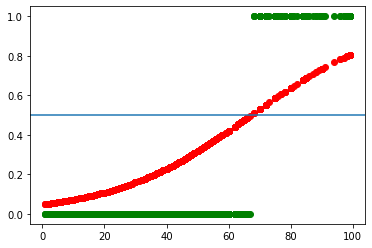

In [92]:
# logistic regression with only hours-per-week
hrs_y, hrs_X = patsy.dmatrices("C(income, [[0],[1]]) ~ 0 + Q('hours-per-week')", data=df2)
lr = sklearn.linear_model.LogisticRegressionCV()
hrs_income_mod = lr.fit(hrs_X, hrs_y.ravel())

print('Intercept is', hrs_income_mod.intercept_)
print('Logistic coefficient is',hrs_income_mod.coef_)

print('Score is', hrs_income_mod.score(hrs_X, hrs_y.ravel()))

yhat = hrs_income_mod.predict(hrs_X)

plt.plot(hrs_X, yhat,'go');
plt.plot(hrs_X, logistic(hrs_income_mod, hrs_X), 'ro')
plt.axhline(0.5);

### Multiple Feature Logistic Regression

For fun, we attempt to create a model using all of our features in the following code block.  We can see through the lengthy error message that we have too many categorical variables split into dummy variables to actually create this model.  We should be able to create a similarly successful model with using a small subset of features.  We will see that our final model contains three of our features with the strongest predictive quality.

In [ ]:
# logistic regression with all
y, X = patsy.dmatrices("""C(income, [[0],[1]]) ~ 0 + age + Q('education-num') + C(Q('marital-status')) + 
                       C(occupation) + C(race) + C(sex) + Q('hours-per-week')""", data=df2)
lr = sklearn.linear_model.LogisticRegressionCV()
income_mod = lr.fit(X, y.ravel())

print('Intercept is', income_mod.intercept_)
print('Logistic coefficient is',income_mod.coef_)

print('Score is', income_mod.score(X, y.ravel()))

In [ ]:
# logistic regression with education-num and marital-status
y, X = patsy.dmatrices("C(income, [[0],[1]]) ~ 0 + Q('education-num') + C(Q('marital-status'))", data=df2)
lr = sklearn.linear_model.LogisticRegressionCV()
income_mod = lr.fit(X, y.ravel())

print('Intercept is', income_mod.intercept_)
print('Logistic coefficient is',income_mod.coef_)

print('Score is', income_mod.score(X, y.ravel()))

In [ ]:
# logistic regression with education-num, marital-status and sex
y, X = patsy.dmatrices("C(income, [[0],[1]]) ~ 0 + Q('education-num') + C(Q('marital-status')) + C(sex)", data=df2)
lr = sklearn.linear_model.LogisticRegressionCV()
income_mod = lr.fit(X, y.ravel())

print('Intercept is', income_mod.intercept_)
print('Logistic coefficient is',income_mod.coef_)

print('Score is', income_mod.score(X, y.ravel()))

In [ ]:
# logistic regression with education-num, marital-status, and hours-per-week
y, X = patsy.dmatrices("C(income, [[0],[1]]) ~ 0 + Q('education-num') + C(Q('marital-status')) + Q('hours-per-week')", data=df2)
lr = sklearn.linear_model.LogisticRegressionCV()
income_mod = lr.fit(X, y.ravel())

print('Intercept is', income_mod.intercept_)
print('Logistic coefficient is',income_mod.coef_)

print('Score is', income_mod.score(X, y.ravel()))

In [ ]:
# logistic regression with education-num, marital-status, and race
y, X = patsy.dmatrices("C(income, [[0],[1]]) ~ 0 + Q('education-num') + C(Q('marital-status')) + C(race)", data=df2)
lr = sklearn.linear_model.LogisticRegressionCV()
income_mod = lr.fit(X, y.ravel())

print('Intercept is', income_mod.intercept_)
print('Logistic coefficient is',income_mod.coef_)

print('Score is', income_mod.score(X, y.ravel()))

### Train/Test and Confusion Matrix

At this point, we have seen that a logistic regression model with education-num, marital-status, and race gives us the model with the highest score.  Let's see how it performs when we split the test and train data

In [ ]:
y, X = patsy.dmatrices("C(income, [[0],[1]]) ~ 0 + Q('education-num') + C(Q('marital-status')) + C(race)", data=df2)
lr = sklearn.linear_model.LogisticRegressionCV()

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.5, random_state=0
)
model = lr.fit(X_train, y_train.ravel())
print('Test score is',model.score(X_test, y_test.ravel()))

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = sklearn.metrics.plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=["<=50K", ">50K"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Summary

Through our final logistic regression modeling, we found that we had too many features (including our dummy variables for categories such as occupation) to create an overarching model with every feature included.  Instead, we opted to use a Forward Stepwise Selection method to create a model with three features that had the best predictive score.  In doing so, we came up with a logistic regression model using the features of education (in it's numerical format), marital-status, and race.

By using a train/test split method from the sklearn library, and then a corresponding confusion matrix, we can see that our model has a very high predictive quality in predicting if an individual will have an income of <=50K, but has a poor predicitve quality in predicting if someone will have a high income.  This could be the result of our data having many more rows of those with income <=50K than those with >50K.

Because of this, if I had to do this project over again, I would figure out a way to maybe implement some kind of case control as explained in lecture.  The ratio there was around 5:1 for controls vs cases, and if applied here, it seems like we could use a subset of the <=50K rows and still have a model at the end that would be predictive of the population as a whole.  Additionally, it was difficult to find p-values and create visualizations with the sklearn library for logistic regression, while at the same time it was difficult to find ways to implement statsmodel for this with my limited knowledge (our lectures did not cover statsmodel with logistic regression).  Ideally, I would have found a way to examine p-values for the various features in the models I created to help weed out any features that did not have statistical significance to the overall model.